# Polynomial Regression

Polynomial Regression is linear regression with an additional step of polynomial transformation.

``
Features --> Polynomial Transformation --> Linear Regression --> Label
``
We use polynomial transformation of deferrent degrees for modeling relationship between input features and labels.  
Each degree result in a new polynomial model.  
Thus we have multiple polynomial models from which we need to select the best performing model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import functools
import seaborn as sns
import math

In [ ]:
#@title [Linear Regression Class - LinReg]
#Linear Regression Class Defenition
class LinReg():
  ''' Linear Regression Model class definition
      y = X@w
      X: feature matrix
      w: weight vector
      y: label vector
  '''
  def __init__(self):
    self.t0 = 20
    self.t1 = 100
  
  def predict(self, X:np.ndarray):
    ''' Args:
          X: feature matrix
        Returns:
          y: label vector predicted by the given model
    '''
    y = X@self.w
    return y
  
  def loss(self, X:np.ndarray, y:np.ndarray, reg_rate:float):
    ''' Calculates loss for a model based on known labels.
        Args:
          X: feature matrix
          y: label vector
          reg_rate: regularization rate
        Returns:
          Loss 
    '''
    e = y - self.predict(X)
    return (1/2) * np.transpose(e)@e
    # return (1/2) * np.transpose(e)@e + (reg_rate/2)*np.transpose(self.w)@self.w
  
  def rmse(self, X:np.ndarray, y:np.ndarray):
    ''' Calculates root mean squared error of prediction w.r.t actual label
        Args:
          X: feature matrix
          y: label vector
        Returns:
          Loss
    '''
    return np.sqrt((2/X.shape[0])* self.loss(X,y,0))
  
  def fit(self, X:np.ndarray, y:np.ndarray, reg_rate:float):
    ''' Estimate parameters of linear regression model w.r.t known labels.
        Args:
          X: feature matrix
          y: label vector
          reg_rate: rate of regression
        Returns:
          weight vector
    '''
    self.w = np.zeros(X.shape[1])
    eye = np.eye(np.size(X,1))
    self.w = np.linalg.solve(reg_rate*eye + X.T@X, X.T@y)
    return self.w
  
  def calculate_gradient(self, X:np.ndarray, y:np.ndarray, reg_rate:float):
    ''' Calculates the gradient of loss function w.r.t weight vector
        Args:
          X: feature matrix
          y: label vector
          reg_rate: rate of regression
        Returns:
          gradient vector
    '''
    grad = np.transpose(X) @ (self.predict(X) - y) + reg_rate * self.w
    return grad
  
def update_weights(self, grad:np.ndarray, lr:float):
  ''' updates the weights based on the gradient of loss function
      w_new = w_old - lr * grad
      Args:
        grad: gradient of loss w.r.t w
        lr: learning rate
      Returns:
      updated weight vector
  '''
  w_new = self.w - lr * grad
  return w_new

def learning_schedule(self, t):
  return (self.t0/(t + self.t1))

def gd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, lr:float,reg_rate:float):
  ''' Estimates parameter of linear regression model using gradient descent
      Args:
        X: feature matrix
        y: label vector
        num_epochs: number of iterations
        lr: learning rate
        reg_rate: rate of regression
      Returns:
        weight vector: final weight vector
  '''
  self.w = np.zeros(X.shape[1])
  self.w_all = []
  self.err_all = []
  for i in np.arange(0, num_epochs):
    
    self.w_all.append(self.w)
    self.err_all.append(self.loss(X,y,0))
    
    grad = self.calculate_gradient(X,y,reg_rate)
    self.w = self.update_weights(grad,lr)
  return self.w

def mbgd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, batch_size:int, reg_rate:float):
  ''' Estimates parameter of linear regression model using MBGD
      Args:
        X: feature matrix
        y: label vector
        num_epochs: number of iterations
        batch_size: number of examples in a batch
        reg_rate: rate of regression
      Returns:
        weight vector: final weight vector
  '''
  self.w = np.zeros(X.shape[1])
  self.w_all = []
  self.err_all = []
  mini_batch_id = 0

  for epoch in range(num_epochs):
    shuffled_indices = np.random.permutation(X.shape[0])
    X_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, X.shape[0],batch_size):
      mini_batch_id += 1
      xi = X_shuffled[i:i+batch_size]
      yi = y_shuffled[i:i+batch_size]
      self.w_all.append(self.w)
      self.err_all.append(self.loss(xi,yi,0))

      grad = (2/batch_size) * self.calculate_gradient(xi,yi,reg_rate)
      lr = self.learning_schedule(mini_batch_id)
      self.w = self.update_weights(grad,lr)
  return self.w

def sgd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, reg_rate:float):
  ''' Estimates parameter of linear regression model using Stochastic GD
      Args:
        X: feature matrix
        y: label vector
        num_epochs: number of iterations
        reg_rate: rate of regression
      Returns:
        weight vector: final weight vector
  '''
  self.w = np.zeros(X.shape[1])
  self.w_all = []
  self.err_all = []

  for epoch in range(num_epochs):
    for i in range(0, X.shape[0]):
      random_index = np.random.randint(X.shape[0])
      xi = X[random_index:random_index+1]
      yi = y[random_index:random_index+1]

      self.w_all.append(self.w)
      self.err_all.append(self.loss(xi,yi,0))

      grad = 2 * self.calculate_gradient(xi,yi,reg_rate)
      lr = self.learning_schedule(epoch *X.shape[0] + i)
      self.w = self.update_weights(grad,lr)
  return self.w


Steps in generating Polynomial Transformation:  
1.   Generate combination of input features of length = 0,1,2,...,M.
2.   Perform multiplication operation between features to obtain new features.

For example:
for a single feature $x_1$, $𝞥_m = [1,x_1^2,x_1^3,...,x_1^m ] $  
Generate combinations of {1, $x_1$, ($x_1$,$x_1$),($x_1$,$x_1$,$x_1$),...,($x_1$,$x_1$,...m-times)}
*   0-th degree : 1
*   1-st degree : $x_1$
*   2-nd degree : ($x_1$,$x_1$)
*   m-th degree : ($x_1$,$x_1$,...m-times)  
Taking product of elements in these combinations:
$$  𝞥_m(x_1) = \{ 1, x_1, (x_1*x_1),(x_1*x_1*x_1),...(π_{i=1}^mx_1) \}  
            = \{ 1,x_1^2,x_1^3,...,x_1^m \}
$$
For two features $(x_1,x_2)$ obtain $𝞥_2(x_1,x_2) = \{1,x_1,x_2,(x_1,x_1), (x_1,x_2),(x_2,x_2)  \} $   
$ 𝞥_2(x_1,x_2) = \{1,x_1,x_2,x_1^2,x_2^2,x_1x_2 \} $
$ 𝞥_3(x_1,x_2) = \{1,x_1,x_2,x_1^2,x_2^2,x_1x_2,x_1^3,x_2^3,x_1^2x_2,x_1x_2^2 \} $

In [ ]:
def get_combinations(x, degree):
  return itertools.combinations_with_replacement(x, degree)

def compute_new_feature(items):
  return functools.reduce(lambda x, y: x*y, items) 

In [ ]:
{items: compute_new_feature(items) for items in get_combinations([1],3) }

{(1, 1, 1): 1}

In [ ]:
{items: compute_new_feature(items) for items in get_combinations([1,3,5],2)}

{(1, 1): 1, (1, 3): 3, (1, 5): 5, (3, 3): 9, (3, 5): 15, (5, 5): 25}

In [ ]:
{items: compute_new_feature(items) for items in get_combinations([2,4],4)}

{(2, 2, 2, 2): 16,
 (2, 2, 2, 4): 32,
 (2, 2, 4, 4): 64,
 (2, 4, 4, 4): 128,
 (4, 4, 4, 4): 256}

In [ ]:
d = {items: compute_new_feature(items) for items in get_combinations([2,3,4,5,6],4)}
print(len(d))
print(d)

70
{(2, 2, 2, 2): 16, (2, 2, 2, 3): 24, (2, 2, 2, 4): 32, (2, 2, 2, 5): 40, (2, 2, 2, 6): 48, (2, 2, 3, 3): 36, (2, 2, 3, 4): 48, (2, 2, 3, 5): 60, (2, 2, 3, 6): 72, (2, 2, 4, 4): 64, (2, 2, 4, 5): 80, (2, 2, 4, 6): 96, (2, 2, 5, 5): 100, (2, 2, 5, 6): 120, (2, 2, 6, 6): 144, (2, 3, 3, 3): 54, (2, 3, 3, 4): 72, (2, 3, 3, 5): 90, (2, 3, 3, 6): 108, (2, 3, 4, 4): 96, (2, 3, 4, 5): 120, (2, 3, 4, 6): 144, (2, 3, 5, 5): 150, (2, 3, 5, 6): 180, (2, 3, 6, 6): 216, (2, 4, 4, 4): 128, (2, 4, 4, 5): 160, (2, 4, 4, 6): 192, (2, 4, 5, 5): 200, (2, 4, 5, 6): 240, (2, 4, 6, 6): 288, (2, 5, 5, 5): 250, (2, 5, 5, 6): 300, (2, 5, 6, 6): 360, (2, 6, 6, 6): 432, (3, 3, 3, 3): 81, (3, 3, 3, 4): 108, (3, 3, 3, 5): 135, (3, 3, 3, 6): 162, (3, 3, 4, 4): 144, (3, 3, 4, 5): 180, (3, 3, 4, 6): 216, (3, 3, 5, 5): 225, (3, 3, 5, 6): 270, (3, 3, 6, 6): 324, (3, 4, 4, 4): 192, (3, 4, 4, 5): 240, (3, 4, 4, 6): 288, (3, 4, 5, 5): 300, (3, 4, 5, 6): 360, (3, 4, 6, 6): 432, (3, 5, 5, 5): 375, (3, 5, 5, 6): 450, (3, 5,

In [ ]:
def polynomial_transform(x, degree, logging=False):
  #convert feature to matrix
  if(x.ndim ==1):
    x = x[:,None]
  x_t = x.transpose()   # transpose of feature matrix
  features = [np.ones(len(x))] # populates 1's as first feature of each example

  if(logging):
    print('Input: ',x)
  
  for degree in range(1, degree + 1):
    for items in get_combinations(x_t,degree):  # generate combinations 
      features.append(compute_new_feature(items))  # combine features into new feature
      if(logging):
        print(items, ' : ', compute_new_feature(items))
  if(logging):
    print(np.asarray(features).transpose())
  return np.asarray(features).transpose()

In [ ]:
polynomial_transform(np.array([1, 2, 3]),2,True)


Input:  [[1]
 [2]
 [3]]
(array([1, 2, 3]),)  :  [1 2 3]
(array([1, 2, 3]), array([1, 2, 3]))  :  [1 4 9]
(array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]))  :  [ 1  8 27]
[[ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]]


array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [ ]:
polynomial_transform(np.array([2,3]),2,True)

Input:  [[2]
 [3]]
(array([2, 3]),)  :  [2 3]
(array([2, 3]), array([2, 3]))  :  [4 9]
[[1. 2. 4.]
 [1. 3. 9.]]


array([[1., 2., 4.],
       [1., 3., 9.]])

In [ ]:
polynomial_transform(np.array([[2,3],[4,5]]),2,True)

Input:  [[2 3]
 [4 5]]
(array([2, 4]),)  :  [2 4]
(array([3, 5]),)  :  [3 5]
(array([2, 4]), array([2, 4]))  :  [ 4 16]
(array([2, 4]), array([3, 5]))  :  [ 6 20]
(array([3, 5]), array([3, 5]))  :  [ 9 25]
[[ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


array([[ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [ ]:
polynomial_transform(np.array([[2,3],[4,5]]),3,True)

Input:  [[2 3]
 [4 5]]
(array([2, 4]),)  :  [2 4]
(array([3, 5]),)  :  [3 5]
(array([2, 4]), array([2, 4]))  :  [ 4 16]
(array([2, 4]), array([3, 5]))  :  [ 6 20]
(array([3, 5]), array([3, 5]))  :  [ 9 25]
(array([2, 4]), array([2, 4]), array([2, 4]))  :  [ 8 64]
(array([2, 4]), array([2, 4]), array([3, 5]))  :  [12 80]
(array([2, 4]), array([3, 5]), array([3, 5]))  :  [ 18 100]
(array([3, 5]), array([3, 5]), array([3, 5]))  :  [ 27 125]
[[  1.   2.   3.   4.   6.   9.   8.  12.  18.  27.]
 [  1.   4.   5.  16.  20.  25.  64.  80. 100. 125.]]


array([[  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [ ]:
# xxx = np.array([[8, 6, 2]])
# print(xxx,xxx.shape)
# xxx_t = xxx.transpose()
# print(xxx_t,xxx_t.shape)
polynomial_transform(np.array([4, 5, 2]),4,True)

Input:  [[4]
 [5]
 [2]]
(array([4, 5, 2]),)  :  [4 5 2]
(array([4, 5, 2]), array([4, 5, 2]))  :  [16 25  4]
(array([4, 5, 2]), array([4, 5, 2]), array([4, 5, 2]))  :  [ 64 125   8]
(array([4, 5, 2]), array([4, 5, 2]), array([4, 5, 2]), array([4, 5, 2]))  :  [256 625  16]
[[  1.   4.  16.  64. 256.]
 [  1.   5.  25. 125. 625.]
 [  1.   2.   4.   8.  16.]]


array([[  1.,   4.,  16.,  64., 256.],
       [  1.,   5.,  25., 125., 625.],
       [  1.,   2.,   4.,   8.,  16.]])

## Non Linear Training data generation  
We generate training data with a single feature $x_1$ and label $y = sin(2πx_1) + noise$  

In [ ]:
# create a training set by first calculating func(x) (here we use sin(2*pi*x)), and then add a small random noise having gaussian distribution

def non_linear_training_set(func, sample_size, std):
  x = np.linspace(0,1,sample_size)
  y = func(x) + np.random.normal(scale=std,size=x.shape)
  return x, y

def nonlin(x):
  return np.sin(2 * np.pi * x)

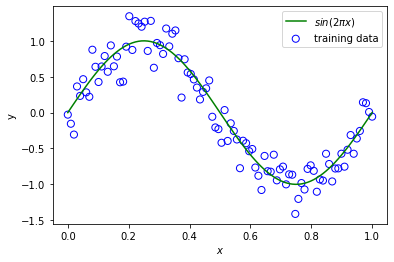

In [ ]:
# visualization of training data and model fitment
def visualize_training_data(x_train, y_train):
  points = np.linspace(0,1,100)
  output = nonlin(points)
  plt.scatter(x_train, y_train,facecolor="none", edgecolor='b', s=50, label='training data')
  plt.plot(points, output,c='g',label="$sin(2 \pi x)$")
  plt.xlabel('$x$')
  plt.ylabel('y')
  #plt.legend()
  #plt.show

x,y = non_linear_training_set(nonlin,100,0.2)
visualize_training_data(x,y)
plt.legend()


In [ ]:
#visualization of model fit
def visualize_model_fit(x, y, lin_reg, degree):
  ''' plots trained data along with data generation function'''
  points = np.linspace(0,1,100)
  output = nonlin(points)

  if(degree > 0):
    plt.scatter(x, y,facecolor="none",edgecolor='b',s=50,label='training data')
  plt.plot(points,output,color='g',label='$sin(2 \pi x)$')

  y_hat = lin_reg.predict(polynomial_transform(points,degree))
  plt.plot(points,y_hat,c='r',label='$h_\mathbf{w}(x)$')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.ylim(-1.5,1.5)
  plt.title("M={}".format(degree))
  #plt.legend()
  #plt.show()


Plynomial Model fit

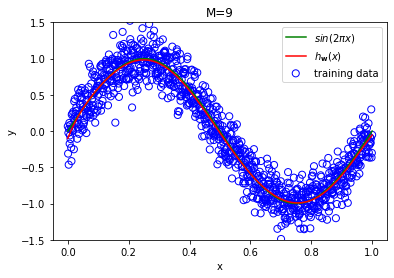

In [ ]:
degree = 9
x,y=non_linear_training_set(nonlin,1000,0.2)
x_transform = polynomial_transform(x,degree)
lin_reg = LinReg()
lin_reg.fit(x_transform, y,0)
visualize_model_fit(x, y, lin_reg,degree)
plt.legend()

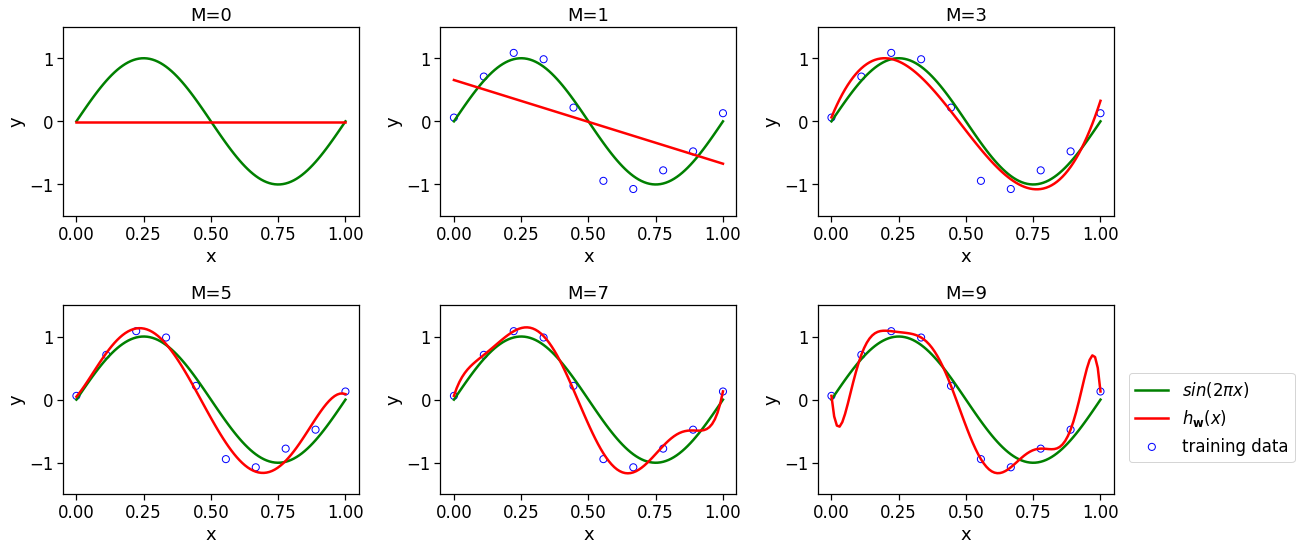

In [ ]:
f = plt.figure(figsize=(16,8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2.5})
 
x,y = non_linear_training_set(nonlin,10,0.2)
for i, degree in enumerate([0,1,3,5,7,9]):
  #print(i,degree)
  plt.subplot(2, 3, i+1)
  x_transform = polynomial_transform(x,degree)
  lin_reg = LinReg()
  lin_reg.fit(x_transform,y,0)
  visualize_model_fit(x,y,lin_reg,degree)
f.tight_layout()
plt.legend(bbox_to_anchor=(1.05,0.64),loc=2,borderaxespad=0.)
plt.show()

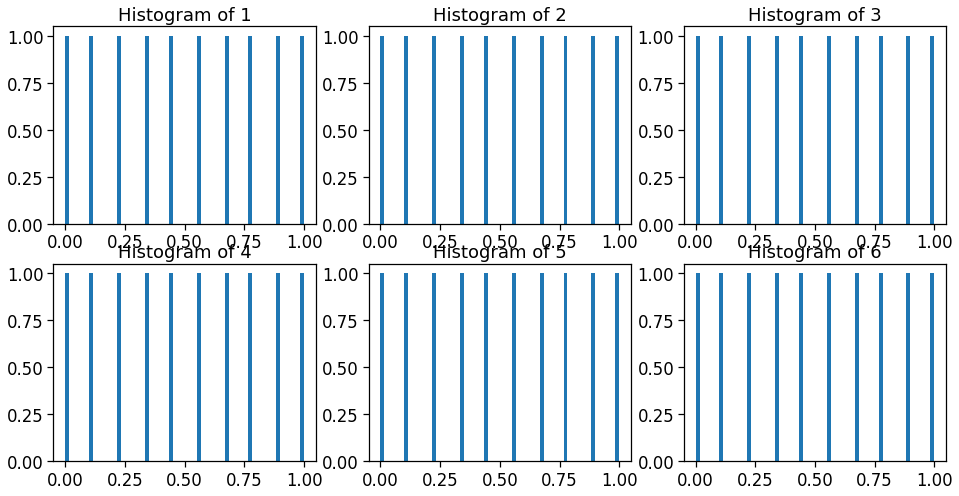

In [ ]:
plt.figure(figsize=(16, 8)) 
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.title('Histogram of {}'.format(str(i)))
    plt.hist(x, bins=60)

## Model Selection
We have one polynomial model per degree.  
To select the best one:
*   fix the list of degress to experiment with.
*   Divide the training data into training, validation and test.
*   for each degree m,
    *   Train polynomial regression with training data
    *   Calculate training and validation errors on the trained model.
*   Select the model with the lowest training and validation loss among all models.

In [ ]:
# Model selection helpers
import pandas as pd

def convert_dict_to_df(w_dict, degree):
  poly_w_dict = {i:np.array(np.zeros(degree)) for i in range(degree)}
  for deg in poly_w_dict:
    weight_vector = w_dict[deg]
    for i in range(len(weight_vector)):
      poly_w_dict[deg][i] = weight_vector[i]
    
  poly_w_df = pd.DataFrame(poly_w_dict)
  poly_w_df.columns = ['w_'+str(i) for i in range(degree)]
  return poly_w_df

def plot_model_selection(training_errors, val_errors):
  plt.plot(training_errors,'o-',mfc='none',mec='b',ms=10,label='training errors')
  plt.plot(val_errors,'o-',mfc='none',mec='r',ms=10,label='velidation errors')
  plt.legend()
  plt.xlabel('degree')
  plt.ylabel('RMSE')
  plt.show()

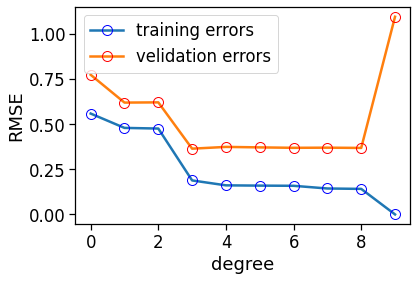

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9
0,-0.177918,0.272363,0.369589,-0.257367,-0.361202,-0.346128,-0.352618,-0.363841,-0.365321,-0.367347
1,0.000000,-0.900562,-1.556837,8.765552,12.659359,11.286077,13.018162,25.154489,35.745555,247.535049
2,0.000000,0.000000,0.656275,-26.549155,-46.212879,-34.765721,-56.134917,-256.393817,-469.977823,-5361.987849
3,0.000000,0.000000,0.000000,18.136953,49.676788,17.319488,109.294514,1296.852668,2907.826913,46972.369293
4,0.000000,0.000000,0.000000,0.000000,-15.769917,21.318874,-156.420645,-3514.313797,-9591.624749,-216602.880220
5,0.000000,0.000000,0.000000,0.000000,0.000000,-14.835517,143.266891,5040.053795,17692.430419,581672.899160
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-52.700802,-3606.330447,-18367.435814,-941858.693199
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1015.322756,10052.733840,905788.367464
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2259.352692,-476171.723945
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105314.463952


In [ ]:
training_errors = []
val_errors = []
w_dict = {}
x_val = np.linspace(0,1,100)
y_val = nonlin(x_val) +np.random.normal(scale=0.25,size=(len(x_val)))
for i in range(10):
  x_transform = polynomial_transform(x,i)
  x_val_transform = polynomial_transform(x_val,i)
  lin_reg = LinReg()
  lin_reg.fit(x_transform,y,0)

  w_dict[i] = lin_reg.w
  training_errors.append(lin_reg.rmse(x_transform, y))
  val_errors.append(lin_reg.rmse(x_val_transform, y_val))
plot_model_selection(training_errors,val_errors)
convert_dict_to_df(w_dict,10)